In [1]:
# 質的回帰について
# 線形回帰は連続データであることが前提で、離散データには不適切
# 離散データを扱う場合のモデリング手法について以下でまとめる

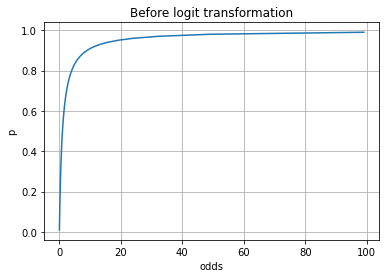

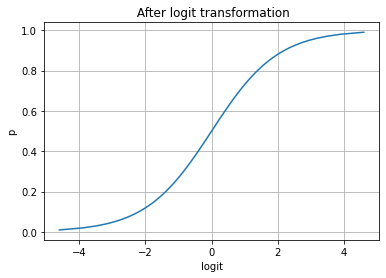

In [13]:
# ロジスティック回帰モデル
# 2値応答(Ex, Yes/No, 表/裏)に対するデータモデル

# オッズ比とは？
# 発生する確率と発生しない確率の比のこと(P/(1-P))
# ロジスティック回帰モデルの目的変数だが、そのままでは使えない
# Pが0から1の間に値が収まるため、通常の線形回帰に当てはめると値が無限に大きくなったり、マイナスにならなかったりと不都合が生じる。

# ロジット変換とは？
# オッズ比に対数を取ること
# 値が-∞から∞を取るものに変換されるので、上記のオッズ比の不都合が解消される

import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0.01, 1, 0.01) # 確率値
odds_val = p/(1-p)
plt.title("Before logit transformation")
plt.xlabel("odds")
plt.ylabel("p")
plt.plot(odds_val, p)
plt.grid()
plt.show()

logit_val = np.log(p/(1-p))
plt.title(" After logit transformation")
plt.xlabel("logit")
plt.ylabel("p")
plt.plot(logit_val, p)
plt.grid()
plt.show()

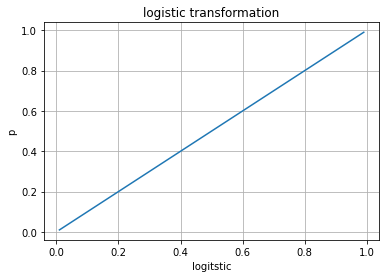

In [14]:
# ロジスティック変換とは
# ロジット変換した値の逆変換し確率値に変換すること(exp(logit値)/(1+exp(logit値)))

logistic_val = np.exp(logit_val)/(1+np.exp(logit_val))
plt.title("logistic transformation")
plt.xlabel("logitstic")
plt.ylabel("p")
plt.plot(logistic_val, p)
plt.grid()
plt.show() # 確率値に変換することを確認

In [26]:
# ロジスティック回帰を実行
# irisデータセットを使用し「versicolor」かどうかを判定

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# データセットを取得
iris_df = sns.load_dataset('iris')

# versicolorかどうかを判定するためのカラムを追加
iris_df['is_versicolor'] = iris_df['species'].apply(lambda x: 1 if x == 'versicolor' else 0)

# 訓練データと検証データに分割
X = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = iris_df['is_versicolor']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# 学習を実行
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

# 推測を実行(ロジスティック変換後の確率値が0.5以上であれば1、以下であれば0に分類)
Y_pred = lr.predict(X_test)

# 各スコアを確認
print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

coefficient =  [[-0.22275981 -1.81087669  0.564339   -0.99095423]]
intercept =  [4.90323519]
confusion matrix = 
 [[26  1]
 [15  3]]
accuracy =  0.6444444444444445
precision =  0.75
recall =  0.16666666666666666
f1 score =  0.27272727272727276


In [27]:
# プロビットモデル
# ロジスティック回帰とは異なり標準正規分布を仮定する2値応答モデル
# 説明は割愛

In [52]:
# ポアソン回帰モデル
# 応答が計数値である場合に使用するモデル

import seaborn as sns
from sklearn.linear_model import PoissonRegressor

# 車の事故データを取得
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

# 訓練データと検証データに分割
X = crash_df[["speeding", "alcohol", "not_distracted", "no_previous"]]
Y = crash_df['total']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# 学習を実行
pr = PoissonRegressor()
pr.fit(X_train, Y_train)
print("coefficient = ", pr.coef_)
print("intercept = ", pr.intercept_)
print("score = ", pr.score(X_test, Y_test))

# 推測を実行
Y_pred = pr.predict(X_test)
print("----- Y predict values -----")
print(np.round(Y_pred, 1).tolist())
print("----- Y test values -----")
print(Y_test.to_list())

coefficient =  [0.00049942 0.02628339 0.00828803 0.05268905]
intercept =  1.7457758135250336
score =  0.9147995153305575
----- Y predict values -----
[11.4, 17.5, 15.4, 12.6, 19.2, 15.7, 14.1, 11.6, 22.3, 12.1, 15.4, 19.2, 15.0, 13.4, 26.9, 17.1]
----- Y test values -----
[11.6, 17.5, 15.6, 14.1, 18.6, 14.7, 13.6, 12.3, 21.4, 12.0, 16.8, 19.4, 14.9, 14.1, 23.9, 16.2]


score: 0.5286110285978982


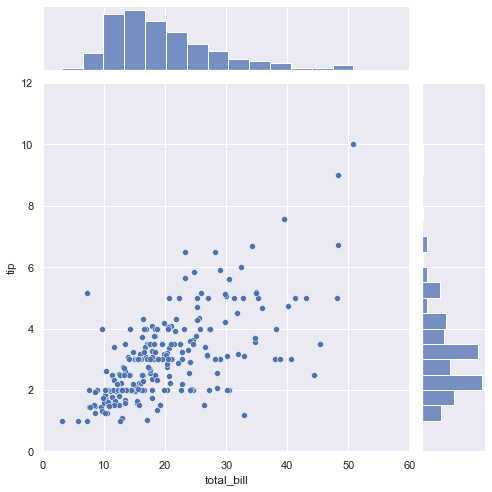

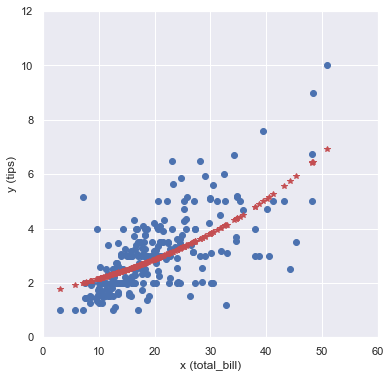

In [50]:
# 一般化線形モデル
# これまでのロジスティック回帰モデル、プロビットモデル、ポアソン回帰モデルは、全て一般化線形モデルとして扱うことができる
# 1.確率分布、2.リンク関数:予測値の関数、3.線形予測子:回帰式 を設定しモデリングする
# ロジスティック回帰モデル：1.ベルヌーイ分布、2.ロジット変換
# プロビットモデル：1.ベルヌーイ分布、2.プロビット変換
# ポアソン回帰：1.ポアソン分布、2.対数関数

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor

# tipsデータを取得
tips_df = sns.load_dataset("tips")

# 会計総額とチップのデータを可視化
sns.set(style="darkgrid")
sns.jointplot(x="total_bill", y="tip", data=tips_df,
    kind="scatter",
    xlim=(0, 60), ylim=(0, 12),
    color="b",
    height=7)

# dfからnumpy.ndarrayに変換
y = tips_df['tip'].values          # 目的変数：y = [y0, y1, y2, ... yi]
X = tips_df['total_bill'].values   # 説明変数：x = [x0, x1, x2, ... xi]

# [x0, x1, x2,..] から [[x0], [x1], [x2]] に変換
X = X.reshape(len(X),1)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# ポアソン回帰を設定
reg = TweedieRegressor(
    power=1,  # 確率分布：ポアソン分布を仮定
    link='log',  # リンク関数：対数関数
)

# モデル生成
reg.fit(X_train, y_train)
print("score:", reg.score(X_test, y_test))

# 推測の実行
y_hat = reg.predict(X)

# 推測結果の可視化
fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(X, y, "o")
plt.plot(X, y_hat, "*", color="r")
plt.xlabel('x (total_bill)'), plt.ylabel('y (tips)')
plt.xlim(0, 60), plt.ylim(0, 12)
plt.show()